In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Section 1: Price Prediction


### Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.


## Step 1: Data Cleaning & Preprocessing:

### Load and Inspect the Dataset

In [2]:
df = pd.read_csv("C:/Users/Omkar/Downloads/vehicles.csv")     #loading csv file into df

In [3]:
#This command configures pandas to display all columns and rows in the DataFrame without truncation
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [4]:
df.head()     #to display top 5 rows

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [5]:
df.tail()     #to display bottom 5 rows

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
258883,Nissan March K10 1989 in Jaffna City | ikman,Very good condition\nno hidden errors\nsmooth ...,"140,000 km",nissan-march-k10-1989-for-sale-jaffna,Nissan March K10 1989,for_sale,"Rs 1,030,000",01 Apr 11:41 am,2023-04-01T11:41:50+05:30,2023-05-31T06:11:16.000Z,Cars,Vehicles,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",False,False,False,False,False,False,False,free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",48a910425b8f190b818a89d56b60a919c8b5297b0208ea...
258884,Toyota Allion 260 2009 in Battaramulla | ikman,Good Conditions Car\nGenuine mileage \nManufac...,"219,000 km",toyota-allion-260-2009-for-sale-colombo-83,Toyota Allion 260 2009,for_sale,"Rs 3,550,000",30 Mar 10:10 am,2023-03-30T10:10:04+05:30,2023-05-29T04:36:57.000Z,Cars,Vehicles,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",c9b739e56cdac87b2a966a338eb8508c15dd977445751b...
258885,Micro Trend Car for Rent in Colombo 3 | ikman,Unlimited km\nPer month 70000\nManual transmis...,NaN,micro-trend-unlimited-km-car-for-rent-for-sale...,Micro Trend Car for Rent,for_sale,"Rs 70,000",01 Apr 11:41 am,2023-04-01T11:41:13+05:30,2023-05-31T06:10:48.000Z,Rentals,Vehicles,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,False,False,False,False,free,NaN,{'Service type': 'Car Rentals'},c7bf4bbdbcd88d9d7f7c7b299c94e9e52091af2fd2888e...
258886,Toyota Roomy custom GS safety 2018 in Borales...,Toyota Roomy Custom G\n2018 Model year \nMilea...,"30,000 km",toyota-roomy-custom-gs-safety-2018-for-sale-co...,Toyota Roomy custom GS safety 2018,for_sale,"Rs 7,250,000",01 Apr 11:40 am,2023-04-01T11:40:57+05:30,2023-05-31T06:10:57.000Z,Cars,Vehicles,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,premium,December 2019,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",7c6477247c19fa63845687656fee40702da46c9d184568...
258887,TVS Star Sport 2007 in Kekirawa | ikman,engine hirawela 40 wiyadankarala hadhala thiye...,"88,102 km",tvs-star-sport-2007-for-sale-anuradhapura-6,TVS Star Sport 2007,for_sale,"Rs 135,000",01 Apr 11:40 am,2023-04-01T11:40:56+05:30,2023-05-31T06:10:26.000Z,Motorbikes,Vehicles,Kekirawa,LK-71,"{'id': 1452, 'name': 'Anuradhapura'}",False,False,False,False,False,False,False,free,NaN,"{'Bike Type': 'Motorbikes', 'Condition': 'Used...",250f50f6456508d02d1f94e93cf90bfe5659696d70e5d2...


In [6]:
df.info()     #to check datatype and null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [7]:
#counting null values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

ad_description               7
details                 103383
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
member_since            150254
dtype: int64

In [8]:
(missing_values/258888) * 100     #to calculate percentage of null values contains in columns

ad_description           0.002704
details                 39.933485
price                    1.472065
timestamp                0.002318
posted_date              0.002318
deactivation_date        0.002318
is_member                3.495720
is_authorized_dealer     3.495720
is_featured_member       3.495720
member_since            58.038225
dtype: float64

In [9]:
df1 = df.drop(columns=['member_since'])   #dropping column member_since

In [10]:
#To counting duplicate values
df1.duplicated().sum()

0

In [11]:
# Remove 'Rs' and commas, then convert to float
df1['price'] = df1['price'].str.replace('Rs ', '').str.replace(',', '')

In [12]:
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')
# errors coerce is used for any values that cannot be converted to a numeric type are set to NaN (Not a Number)

In [13]:
df1['details'].value_counts()

details
50,000 km       3115
100,000 km      2486
25,000 km       2290
45,000 km       2189
60,000 km       2143
2015            2124
30,000 km       2115
35,000 km       2081
40,000 km       1957
150,000 km      1754
65,000 km       1683
80,000 km       1658
55,000 km       1549
200,000 km      1538
20,000 km       1496
2014            1464
120,000 km      1437
2011            1395
75,000 km       1390
70,000 km       1375
2012            1362
2010            1138
85,000 km       1133
15,000 km       1102
2013            1060
90,000 km       1033
28,000 km       1023
32,000 km       1000
2006             972
2016             962
24,000 km        939
38,000 km        923
125,000 km       919
23,000 km        837
160,000 km       834
27,000 km        817
110,000 km       814
21,000 km        800
10,000 km        788
18,000 km        775
48,000 km        773
130,000 km       769
26,000 km        769
29,000 km        745
140,000 km       744
180,000 km       739
2005             737
22,00

In [14]:
df1 = df1.drop(columns=['details'])

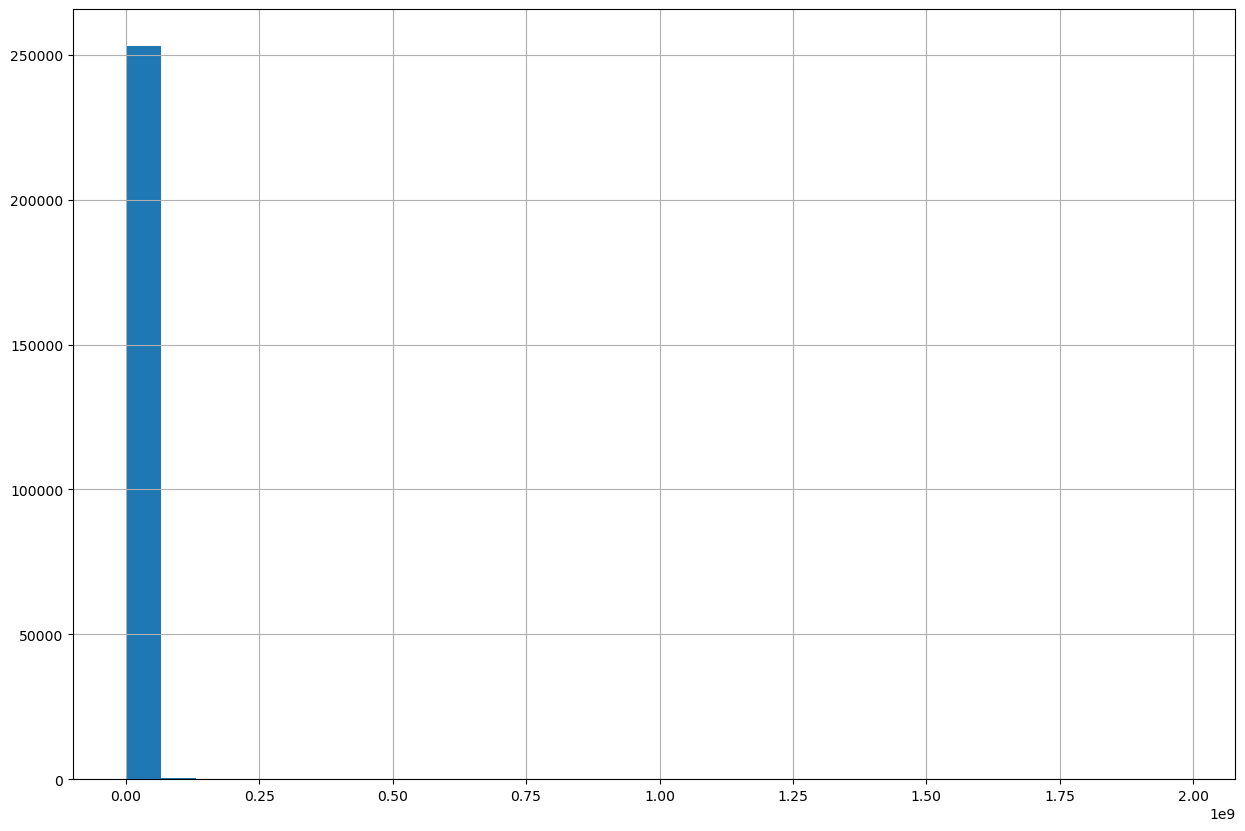

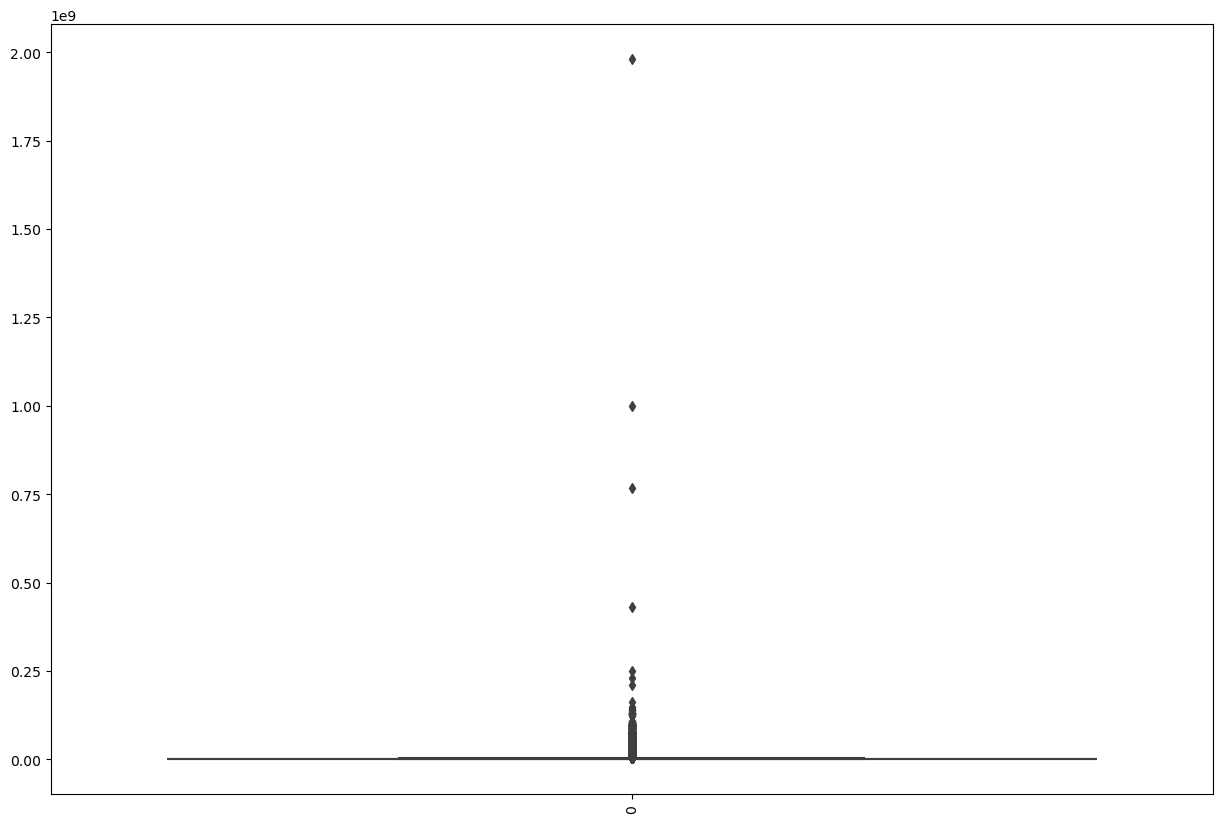

In [15]:
# To see outliers and skewness visually i am plotting box plot and histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of numerical columns
df1['price'].hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots of price column
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1['price'])
plt.xticks(rotation=90)
plt.show()

In [16]:
parent_category_counts = df1['parent_category'].value_counts()   #to see which type of parent category we have
parent_category_counts

parent_category
Vehicles    258888
Name: count, dtype: int64

In [17]:
category_counts = df1['category'].value_counts()
category_counts

category
Motorbikes                  67642
Auto Parts & Accessories    67514
Cars                        48293
Three Wheelers              18117
Lorries & Trucks            12021
Auto Services               11625
Bicycles                    11315
Vans                         9486
Rentals                      7559
Tractors                     2450
Heavy Duty                   1862
Buses                         721
Boats & Water Transport       283
Name: count, dtype: int64

In [18]:
categories_to_filter = ['Motorbikes', 'Cars', 'Three Wheelers', 'Lorries & Trucks', 'Bicycles', 'Vans']
filtered_df = df1[df1['category'].isin(categories_to_filter)]


In [19]:
filtered_df.shape

(166874, 24)

In [20]:
# after filtering we no have 166874 rows and 24 columns

In [21]:
missing_values1 = filtered_df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1

ad_description             7
price                    809
timestamp                  5
posted_date                5
deactivation_date          5
is_member               7854
is_authorized_dealer    7854
is_featured_member      7854
dtype: int64

In [22]:
(missing_values1/179749) * 100     #to calculate percentage of null values contains in columns

ad_description          0.003894
price                   0.450072
timestamp               0.002782
posted_date             0.002782
deactivation_date       0.002782
is_member               4.369426
is_authorized_dealer    4.369426
is_featured_member      4.369426
dtype: float64

In [23]:
filtered_df = filtered_df.dropna(subset=['price'])

In [24]:
filtered_df.shape

(166065, 24)

In [25]:
missing_values1 = filtered_df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
(missing_values1/178317) * 100     #to calculate percentage of null values contains in columns

ad_description          0.003926
timestamp               0.002804
posted_date             0.002804
deactivation_date       0.002804
is_member               4.400590
is_authorized_dealer    4.400590
is_featured_member      4.400590
dtype: float64

In [26]:
# we only have one parent category "Vehicles"   so we will drop this column
filtered_df = filtered_df.drop(columns=['parent_category'])

In [27]:
# converting timestamp in datetime values

In [28]:
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'], format='%d %b %I:%M %p')    
filtered_df['timestamp'].head()

31     1900-11-25 14:29:00
1349   1900-01-12 09:26:00
1701   1900-01-12 09:26:00
1702   1900-11-09 14:33:00
1917   1900-12-14 16:17:00
Name: timestamp, dtype: datetime64[ns]

In [29]:
filtered_df['posted_date'] = pd.to_datetime(filtered_df['posted_date'], utc=True)
filtered_df['posted_date'].head()

31     2022-11-25 08:59:55+00:00
1349   2023-01-12 03:56:22+00:00
1701   2023-01-12 03:56:29+00:00
1702   2022-11-09 09:03:53+00:00
1917   2022-12-14 10:47:03+00:00
Name: posted_date, dtype: datetime64[ns, UTC]

In [30]:
filtered_df['deactivation_date'] = pd.to_datetime(filtered_df['deactivation_date'], utc=True)
filtered_df['deactivation_date'].head()

31     2022-07-24 06:01:26+00:00
1349   2022-04-12 06:41:36+00:00
1701   2022-04-16 06:04:50+00:00
1702   2022-04-16 05:46:11+00:00
1917   2022-08-19 02:41:37+00:00
Name: deactivation_date, dtype: datetime64[ns, UTC]

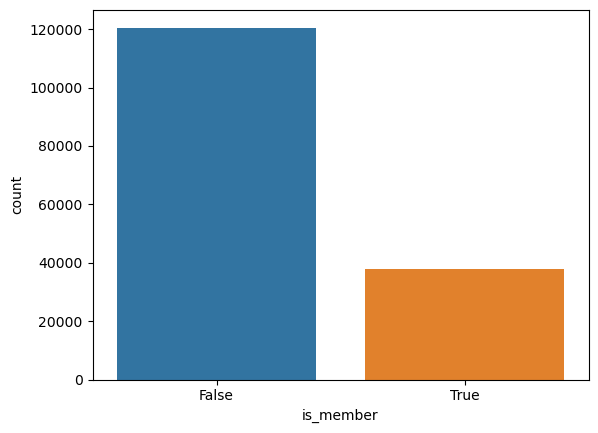

In [31]:
sns.countplot(x = 'is_member', data = filtered_df)
plt.show()

In [32]:
print(filtered_df['is_member'].value_counts())
print('-'* 30)
print('Not Member: ', round(filtered_df['is_member'].value_counts()[0]/len(filtered_df['is_member']) * 100,2), '% of the dataset')
print('Member: ', round(filtered_df['is_member'].value_counts()[1]/len(filtered_df['is_member']) * 100,2), '% of the dataset')

is_member
False    120525
True      37693
Name: count, dtype: int64
------------------------------
Not Member:  72.58 % of the dataset
Member:  22.7 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1015793628.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not Member: ', round(filtered_df['is_member'].value_counts()[0]/len(filtered_df['is_member']) * 100,2), '% of the dataset')
C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1015793628.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Member: ', round(filtered_df['is_member'].value_counts()[1]/len(filtered_df['is_member']) * 100,2), '% of the dataset')


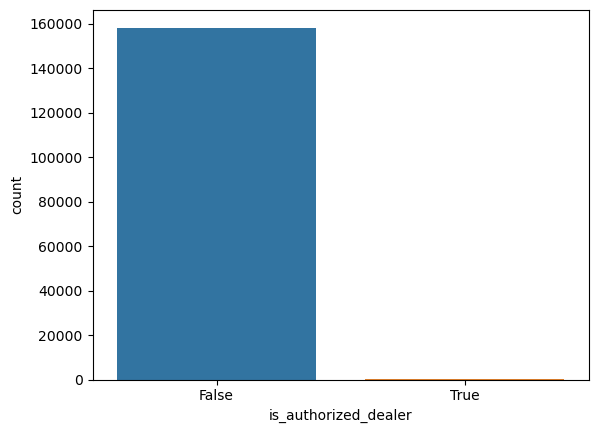

In [33]:
sns.countplot(x = 'is_authorized_dealer', data = filtered_df)
plt.show()

In [34]:
print(filtered_df['is_authorized_dealer'].value_counts())
print('-'* 30)
print('Not Authorized dealer: ', round(filtered_df['is_authorized_dealer'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
print('Authorized dealer: ', round(filtered_df['is_authorized_dealer'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')

is_authorized_dealer
False    158174
True         44
Name: count, dtype: int64
------------------------------
Not Authorized dealer:  95.25 % of the dataset
Authorized dealer:  0.03 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1971727230.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not Authorized dealer: ', round(filtered_df['is_authorized_dealer'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1971727230.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Authorized dealer: ', round(filtered_df['is_authorized_dealer'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')


In [35]:
filtered_df = filtered_df.drop(columns=['is_authorized_dealer'])

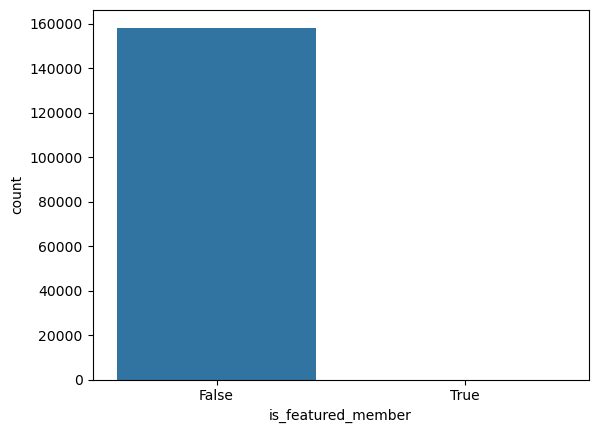

In [36]:
sns.countplot(x = 'is_featured_member', data = filtered_df)
plt.show()

In [37]:
print(filtered_df['is_featured_member'].value_counts())
print('-'* 30)
print('Not Featured_member: ', round(filtered_df['is_featured_member'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
print('Featured_member: ', round(filtered_df['is_featured_member'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')

is_featured_member
False    158204
True         14
Name: count, dtype: int64
------------------------------
Not Featured_member:  95.27 % of the dataset
Featured_member:  0.01 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1111780896.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not Featured_member: ', round(filtered_df['is_featured_member'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1111780896.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Featured_member: ', round(filtered_df['is_featured_member'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')


In [38]:
filtered_df = filtered_df.drop(columns=['is_featured_member'])

In [39]:
# Filling is member categorical column with mode

In [40]:
mode_value = filtered_df['is_member'].mode()[0]
filtered_df['is_member'].fillna(mode_value, inplace=True)

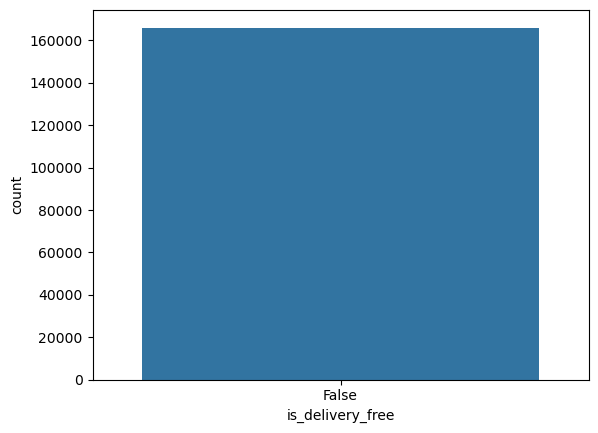

In [41]:
sns.countplot(x = 'is_delivery_free', data = filtered_df)
plt.show()

In [42]:
print(filtered_df['is_delivery_free'].value_counts())
print('-'* 30)
print('is_delivery_free not: ', round(filtered_df['is_delivery_free'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')


is_delivery_free
False    166065
Name: count, dtype: int64
------------------------------
is_delivery_free not:  100.0 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\3573836974.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('is_delivery_free not: ', round(filtered_df['is_delivery_free'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')


In [43]:
filtered_df = filtered_df.drop(columns=['is_delivery_free'])

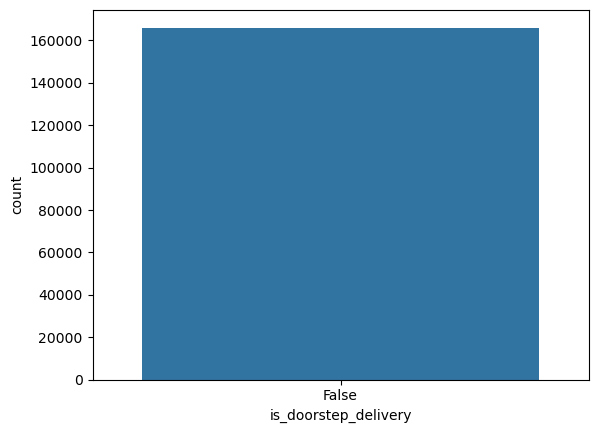

In [44]:
sns.countplot(x = 'is_doorstep_delivery', data = filtered_df)
plt.show()

In [45]:
print(filtered_df['is_doorstep_delivery'].value_counts())
print('-'* 30)
print('Not doorstep_delivery: ', round(filtered_df['is_doorstep_delivery'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')

is_doorstep_delivery
False    166065
Name: count, dtype: int64
------------------------------
Not doorstep_delivery:  100.0 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\3500263426.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not doorstep_delivery: ', round(filtered_df['is_doorstep_delivery'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')


In [46]:
filtered_df = filtered_df.drop(columns=['is_doorstep_delivery'])

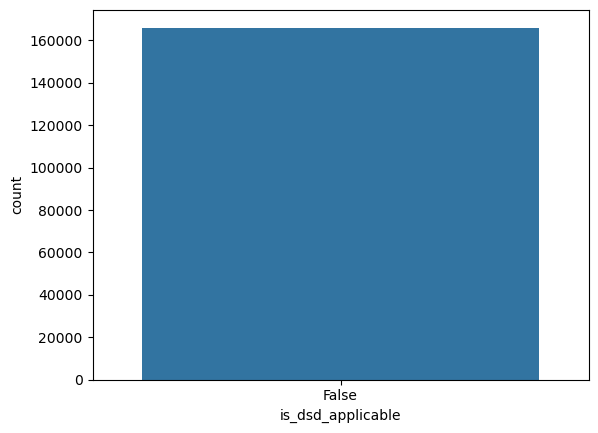

In [47]:
sns.countplot(x = 'is_dsd_applicable', data = filtered_df)
plt.show()

In [48]:
print(filtered_df['is_dsd_applicable'].value_counts())
print('-'* 30)
print('Not dsd_applicable: ', round(filtered_df['is_dsd_applicable'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')

is_dsd_applicable
False    166065
Name: count, dtype: int64
------------------------------
Not dsd_applicable:  100.0 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\1739429869.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not dsd_applicable: ', round(filtered_df['is_dsd_applicable'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')


In [49]:
filtered_df = filtered_df.drop(columns=['is_dsd_applicable'])

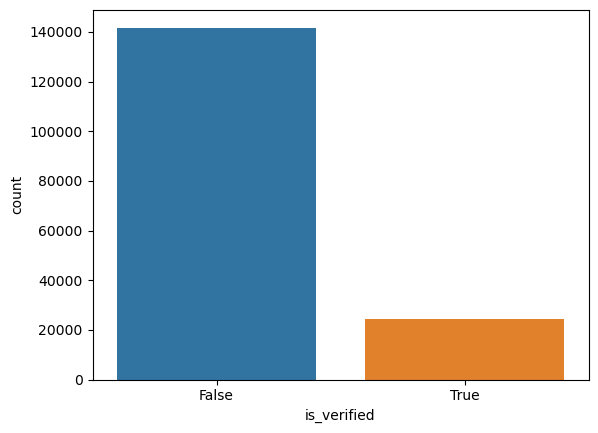

In [50]:
sns.countplot(x = 'is_verified', data = filtered_df)
plt.show()

In [51]:
print(filtered_df['is_verified'].value_counts())
print('-'* 30)
print('Not is_verified: ', round(filtered_df['is_verified'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
print('is_verified: ', round(filtered_df['is_verified'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')

is_verified
False    141751
True      24314
Name: count, dtype: int64
------------------------------
Not is_verified:  85.36 % of the dataset
is_verified:  14.64 % of the dataset


C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\4114902419.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Not is_verified: ', round(filtered_df['is_verified'].value_counts()[0]/len(filtered_df) * 100,2), '% of the dataset')
C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\4114902419.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('is_verified: ', round(filtered_df['is_verified'].value_counts()[1]/len(filtered_df) * 100,2), '% of the dataset')


In [52]:
filtered_df.shape

(166065, 18)

In [53]:
import pandas as pd
# Calculate date difference -- ignore time
filtered_df['date_diff'] = (filtered_df['deactivation_date'] - filtered_df['posted_date']).dt.days

In [54]:
list = [i for i in filtered_df['date_diff'] if i < 0]
list_length = len(list)
print(list_length)


1227


In [55]:
index_names = filtered_df[filtered_df['date_diff'] < 0].index
filtered_df.drop(index_names, inplace=True)

In [56]:
filtered_df.shape

(164838, 19)

In [57]:
list1 = ['timestamp','posted_date','deactivation_date','date_diff']
for i in list1:
  filtered_df = filtered_df.sort_values(i)
  filtered_df[i] = filtered_df[i].fillna(method='ffill')

C:\Users\Omkar\AppData\Local\Temp\ipykernel_47712\3291549083.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_df[i] = filtered_df[i].fillna(method='ffill')


In [58]:
filtered_df.drop(columns = 'ad_description', inplace= True)

In [59]:
filtered_df.isnull().sum()

ad_title             0
slug                 0
title                0
type                 0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
area                 0
is_member            0
is_verified          0
membership_level     0
properties           0
user                 0
date_diff            0
dtype: int64

In [60]:
# no null values 

In [61]:
from sklearn.preprocessing import LabelEncoder
# Label encode the 'is_member' column
label_encoder = LabelEncoder()
filtered_df['is_member'] = label_encoder.fit_transform(filtered_df['is_member'])
filtered_df['is_member'].head()

9498      0
86377     0
101890    0
101997    0
9529      0
Name: is_member, dtype: int64

In [62]:
filtered_df.properties.head()

9498      {'Brand': 'MG', 'Model': 'ZS', 'Trim / Edition...
86377     {'Brand': 'Mitsubishi', 'Model': 'Lancer', 'Tr...
101890    {'Brand': 'Mercedes Benz', 'Model': 'GLC 250',...
101997    {'Brand': 'Bajaj', 'Model': 'RE', 'Trim / Edit...
9529      {'Brand': 'Suzuki', 'Model': 'Wagon R FX', 'Tr...
Name: properties, dtype: object

In [63]:
# Label encode the 'is_verified' column
label_encoder = LabelEncoder()
filtered_df['is_verified'] = label_encoder.fit_transform(filtered_df['is_verified'])
filtered_df['is_verified'].head()

9498      0
86377     0
101890    0
101997    0
9529      0
Name: is_verified, dtype: int64

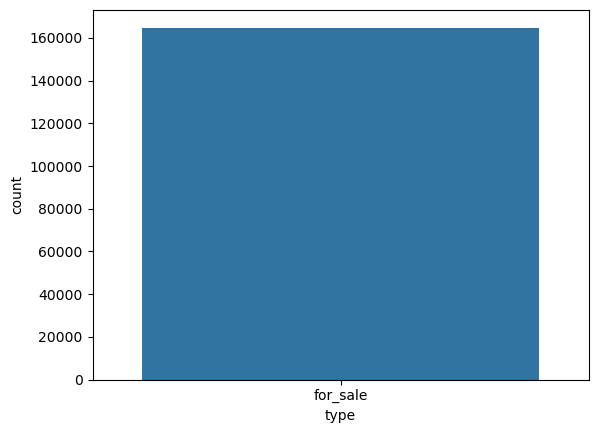

In [64]:
sns.countplot(x = 'type', data = filtered_df)
plt.show()

In [65]:
filtered_df.drop(columns = 'type', inplace= True)

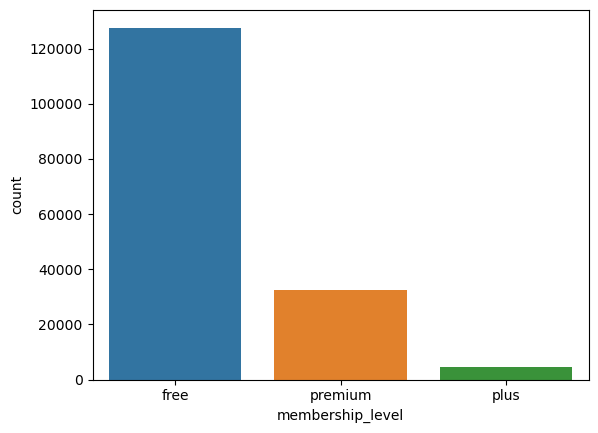

In [66]:
sns.countplot(x = 'membership_level', data = filtered_df)
plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical column
filtered_df['membership_level'] = label_encoder.fit_transform(filtered_df['membership_level'])

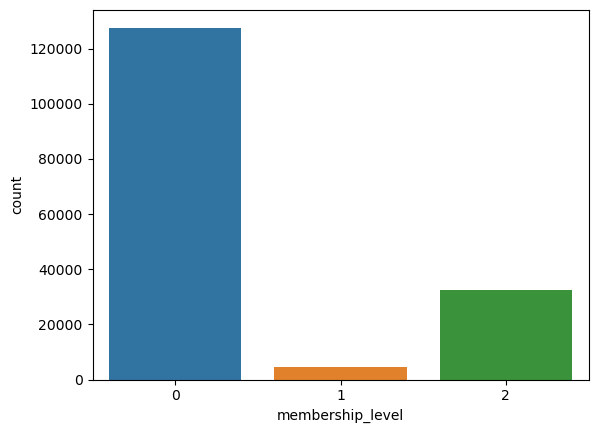

In [68]:
sns.countplot(x = 'membership_level', data = filtered_df)
plt.show()

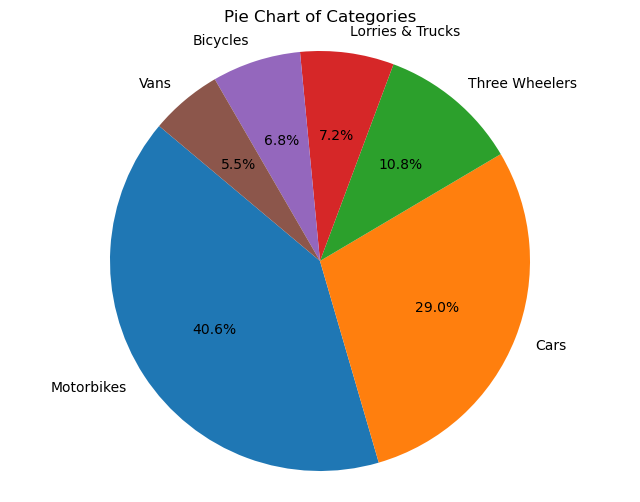

In [69]:
category_counts = filtered_df['category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [70]:
filtered_df.drop(columns = 'ad_title', inplace= True)

In [71]:
filtered_df.drop(columns = 'area', inplace= True)

In [72]:
# Label encode the 'is_member' column
label_encoder = LabelEncoder()
filtered_df['is_member'] = label_encoder.fit_transform(filtered_df['is_member'])
filtered_df['is_member'].head()

9498      0
86377     0
101890    0
101997    0
9529      0
Name: is_member, dtype: int64

In [73]:
# Label encode the 'category' column
label_encoder = LabelEncoder()
filtered_df['category'] = label_encoder.fit_transform(filtered_df['category'])
filtered_df['category'].head()

9498      1
86377     1
101890    1
101997    4
9529      1
Name: category, dtype: int32

In [74]:
# Label encode the 'geo_region' column
label_encoder = LabelEncoder()
filtered_df['geo_region'] = label_encoder.fit_transform(filtered_df['geo_region'])
filtered_df['geo_region'].head()

9498       1
86377      8
101890     1
101997    15
9529      16
Name: geo_region, dtype: int32

In [75]:
filtered_df['geo_region'].value_counts()

geo_region
1     51111
2     29528
0     21525
15    11304
3     10615
6      5962
17     5050
16     4593
8      4051
20     3699
13     2715
7      2418
19     2382
12     2200
14     1974
4      1943
18     1619
11      776
5       769
9       368
10      236
Name: count, dtype: int64

In [76]:
df_num = filtered_df[['is_member','is_verified','membership_level','date_diff','price','category','geo_region']].copy()

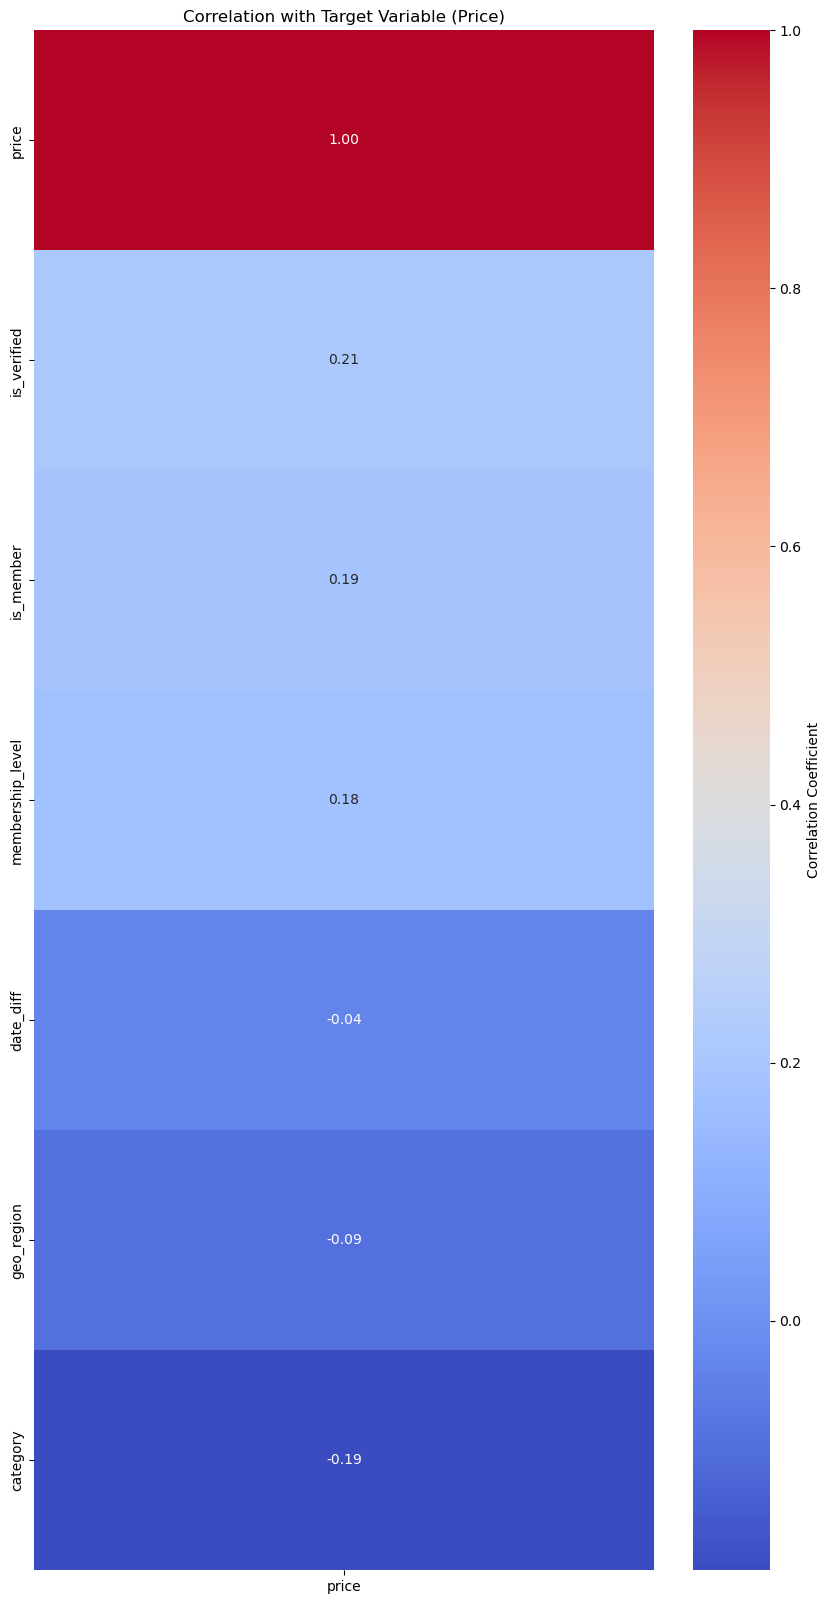

In [77]:
mat = df_num.corr()
target_correlation = mat['price'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Price)')
plt.show()

In [78]:
import ast

In [79]:
dict_df=filtered_df["properties"].apply(pd.Series)

In [80]:
filtered_df['properties'].head()

9498      {'Brand': 'MG', 'Model': 'ZS', 'Trim / Edition...
86377     {'Brand': 'Mitsubishi', 'Model': 'Lancer', 'Tr...
101890    {'Brand': 'Mercedes Benz', 'Model': 'GLC 250',...
101997    {'Brand': 'Bajaj', 'Model': 'RE', 'Trim / Edit...
9529      {'Brand': 'Suzuki', 'Model': 'Wagon R FX', 'Tr...
Name: properties, dtype: object

In [81]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'Brand': 'Mercedes Benz', 'Model': 'GLC 250', 'Trim / Edition': '2015', 'Year of Manufacture': '2015', 'Condition': 'Used', 'Transmission': 'Tiptronic', 'Body type': 'SUV / 4x4', 'Fuel type': 'Petrol', 'Engine capacity': '2,000 cc', 'Mileage': '94,000 km'}


In [82]:
Condition = []
Brand = []
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    
    # Check if 'Condition' key exists before appending
    if 'Condition' in dict_converted: 
        Condition.append(dict_converted['Condition'])
    else:
        Condition.append('NaN') # Or any default value you prefer

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])
        

In [83]:
filtered_df['Condition'] = Condition
filtered_df['Brand'] = Brand


In [84]:
filtered_df['Brand'].value_counts().sum()

164838

In [85]:
filtered_df['Brand'].isnull().sum()

0

In [86]:
filtered_df.columns

Index(['slug', 'title', 'price', 'timestamp', 'posted_date',
       'deactivation_date', 'category', 'location', 'geo_region', 'is_member',
       'is_verified', 'membership_level', 'properties', 'user', 'date_diff',
       'Condition', 'Brand'],
      dtype='object')

In [87]:
filtered_df.isnull().sum()

slug                 0
title                0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
is_member            0
is_verified          0
membership_level     0
properties           0
user                 0
date_diff            0
Condition            0
Brand                0
dtype: int64

In [88]:
filtered_df.replace('NaN', np.nan, inplace=True)


In [89]:
filtered_df['Brand'].value_counts()

Brand
Bajaj              37224
Honda              19780
Toyota             18509
Suzuki             11324
Yamaha              8552
TVS                 8476
Nissan              7289
Hero                7067
Other               5219
Mitsubishi          4553
Tata                3849
Mahindra            2551
Isuzu               2443
Lumala              1822
Demak               1552
Mercedes Benz       1409
Mazda               1381
Micro               1271
BMW                 1268
Daihatsu            1186
Tomahawk            1179
Hyundai             1074
Kia                 1068
Land Rover           923
Piaggio              905
Audi                 773
Perodua              737
Ranomoto             718
DSI                  712
Shimano              652
Other brand          639
Ashok Leyland        516
Maruti Suzuki        504
KTM                  444
Kenton               419
Peugeot              368
Kids                 321
DFSK                 316
Loncin               310
Foton              

In [90]:
# Count occurrences of each brand
brand_counts = filtered_df['Brand'].value_counts()

# Create a mask for brands with at least 100 occurrences
brands_to_keep = brand_counts[brand_counts >= 100].index

# Filter the DataFrame to keep only the brands with at least 100 occurrences
new_filtered_df = filtered_df[filtered_df['Brand'].isin(brands_to_keep)]


In [91]:
new_filtered_df['Brand'].value_counts()

Brand
Bajaj            37224
Honda            19780
Toyota           18509
Suzuki           11324
Yamaha            8552
TVS               8476
Nissan            7289
Hero              7067
Other             5219
Mitsubishi        4553
Tata              3849
Mahindra          2551
Isuzu             2443
Lumala            1822
Demak             1552
Mercedes Benz     1409
Mazda             1381
Micro             1271
BMW               1268
Daihatsu          1186
Tomahawk          1179
Hyundai           1074
Kia               1068
Land Rover         923
Piaggio            905
Audi               773
Perodua            737
Ranomoto           718
DSI                712
Shimano            652
Other brand        639
Ashok Leyland      516
Maruti Suzuki      504
KTM                444
Kenton             419
Peugeot            368
Kids               321
DFSK               316
Loncin             310
Foton              305
Ford               285
Kenstar            275
Renault            273
Dfsk 

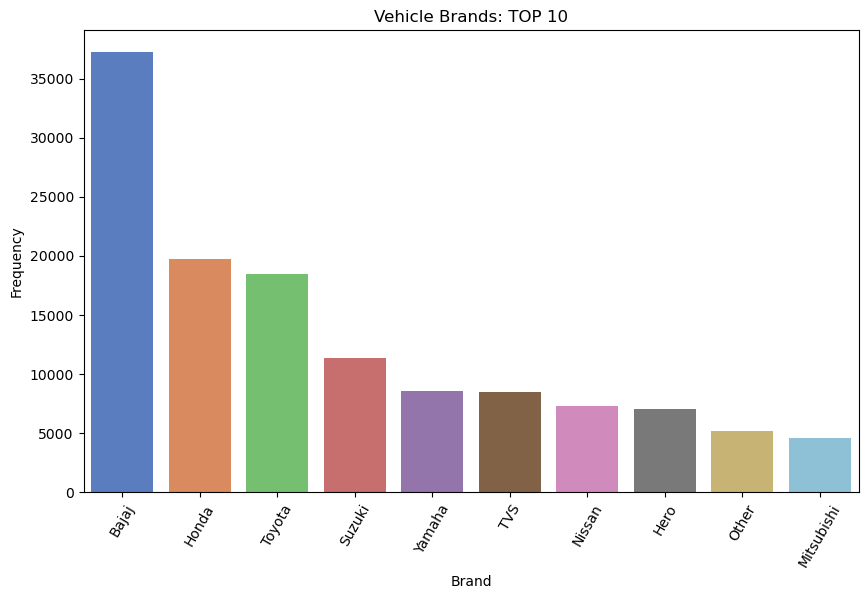

In [92]:
#plotting top 10 Brands which vehicle has sold most
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand', data=new_filtered_df, palette='muted', order=new_filtered_df['Brand'].value_counts().index[:10])
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Vehicle Brands: TOP 10')
plt.xticks(rotation=60)
plt.show()

In [93]:
new_filtered_df.isnull().sum()

slug                 0
title                0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
is_member            0
is_verified          0
membership_level     0
properties           0
user                 0
date_diff            0
Condition            0
Brand                0
dtype: int64

In [94]:
#Label encode the 'condition' column
label_encoder = LabelEncoder()
filtered_df['Condition'] = label_encoder.fit_transform(filtered_df['Condition'])
filtered_df['Condition'].head()

9498      2
86377     2
101890    2
101997    2
9529      2
Name: Condition, dtype: int32

In [95]:
df_num = filtered_df[['is_member','is_verified','membership_level','date_diff','price','category','geo_region','Condition']].copy()

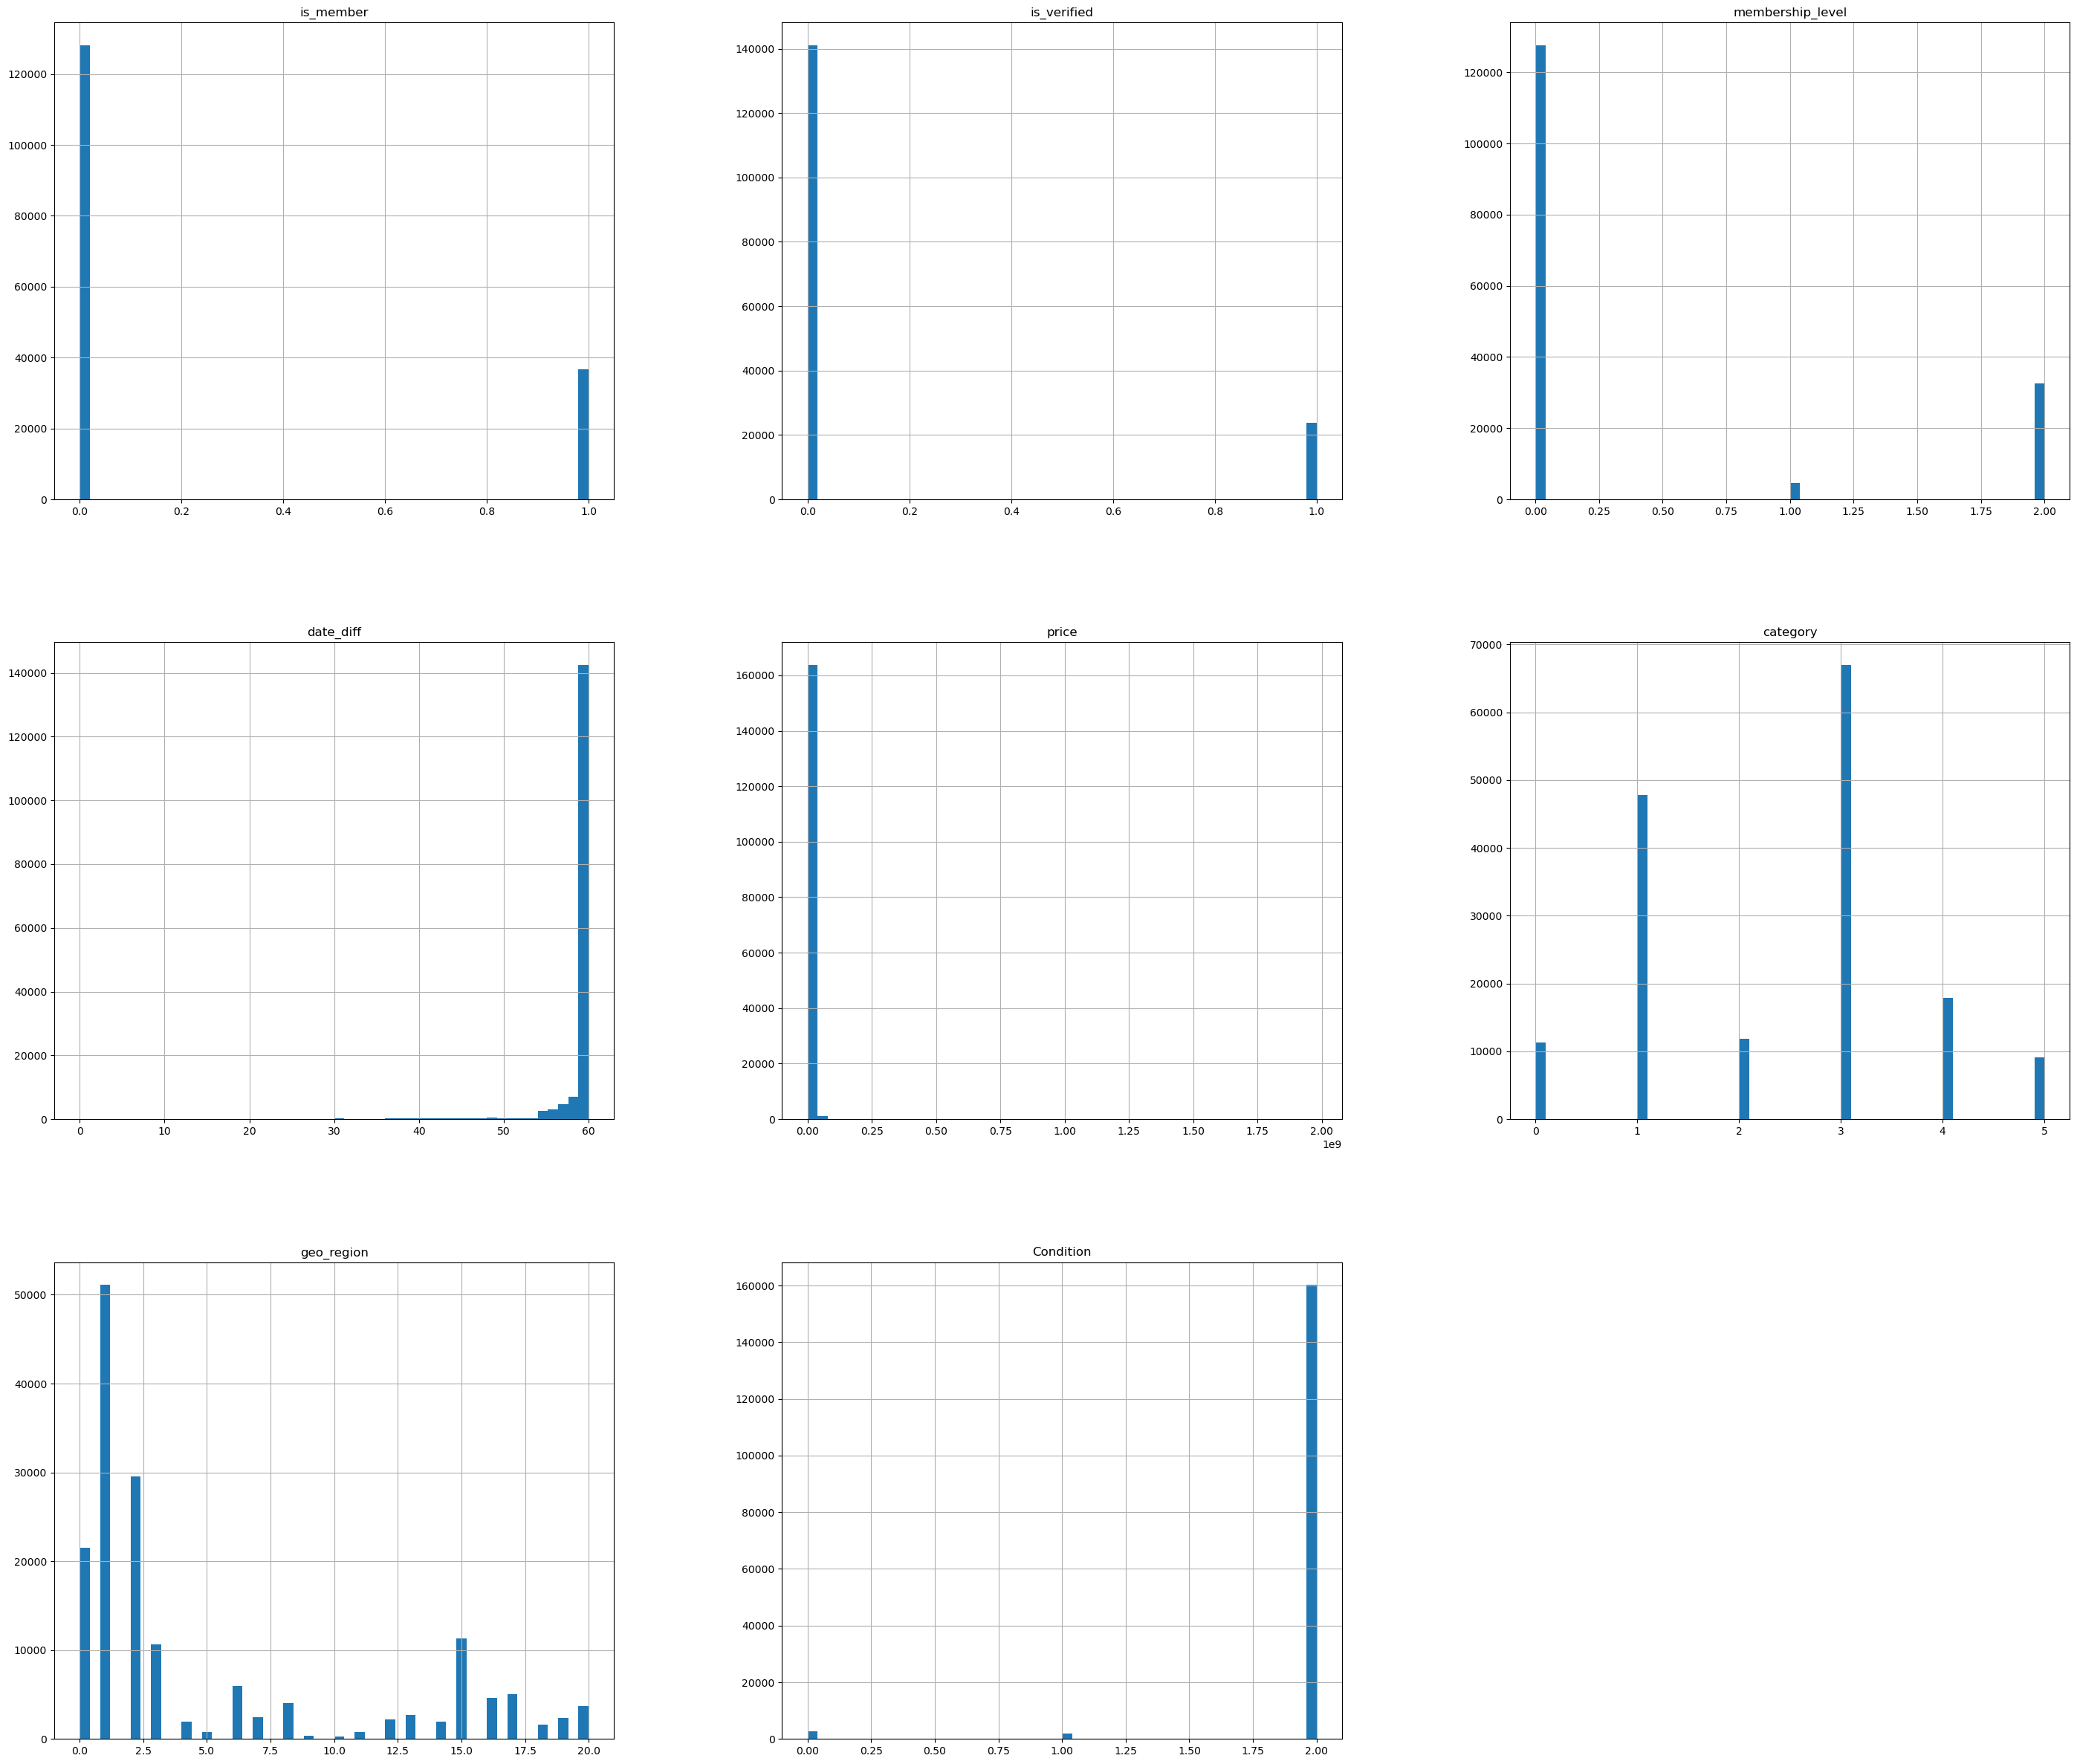

In [96]:
#creating histograms for all numeric columns in the DataFrame
df_num.hist(figsize = (35,30), bins = 50)
plt.show()

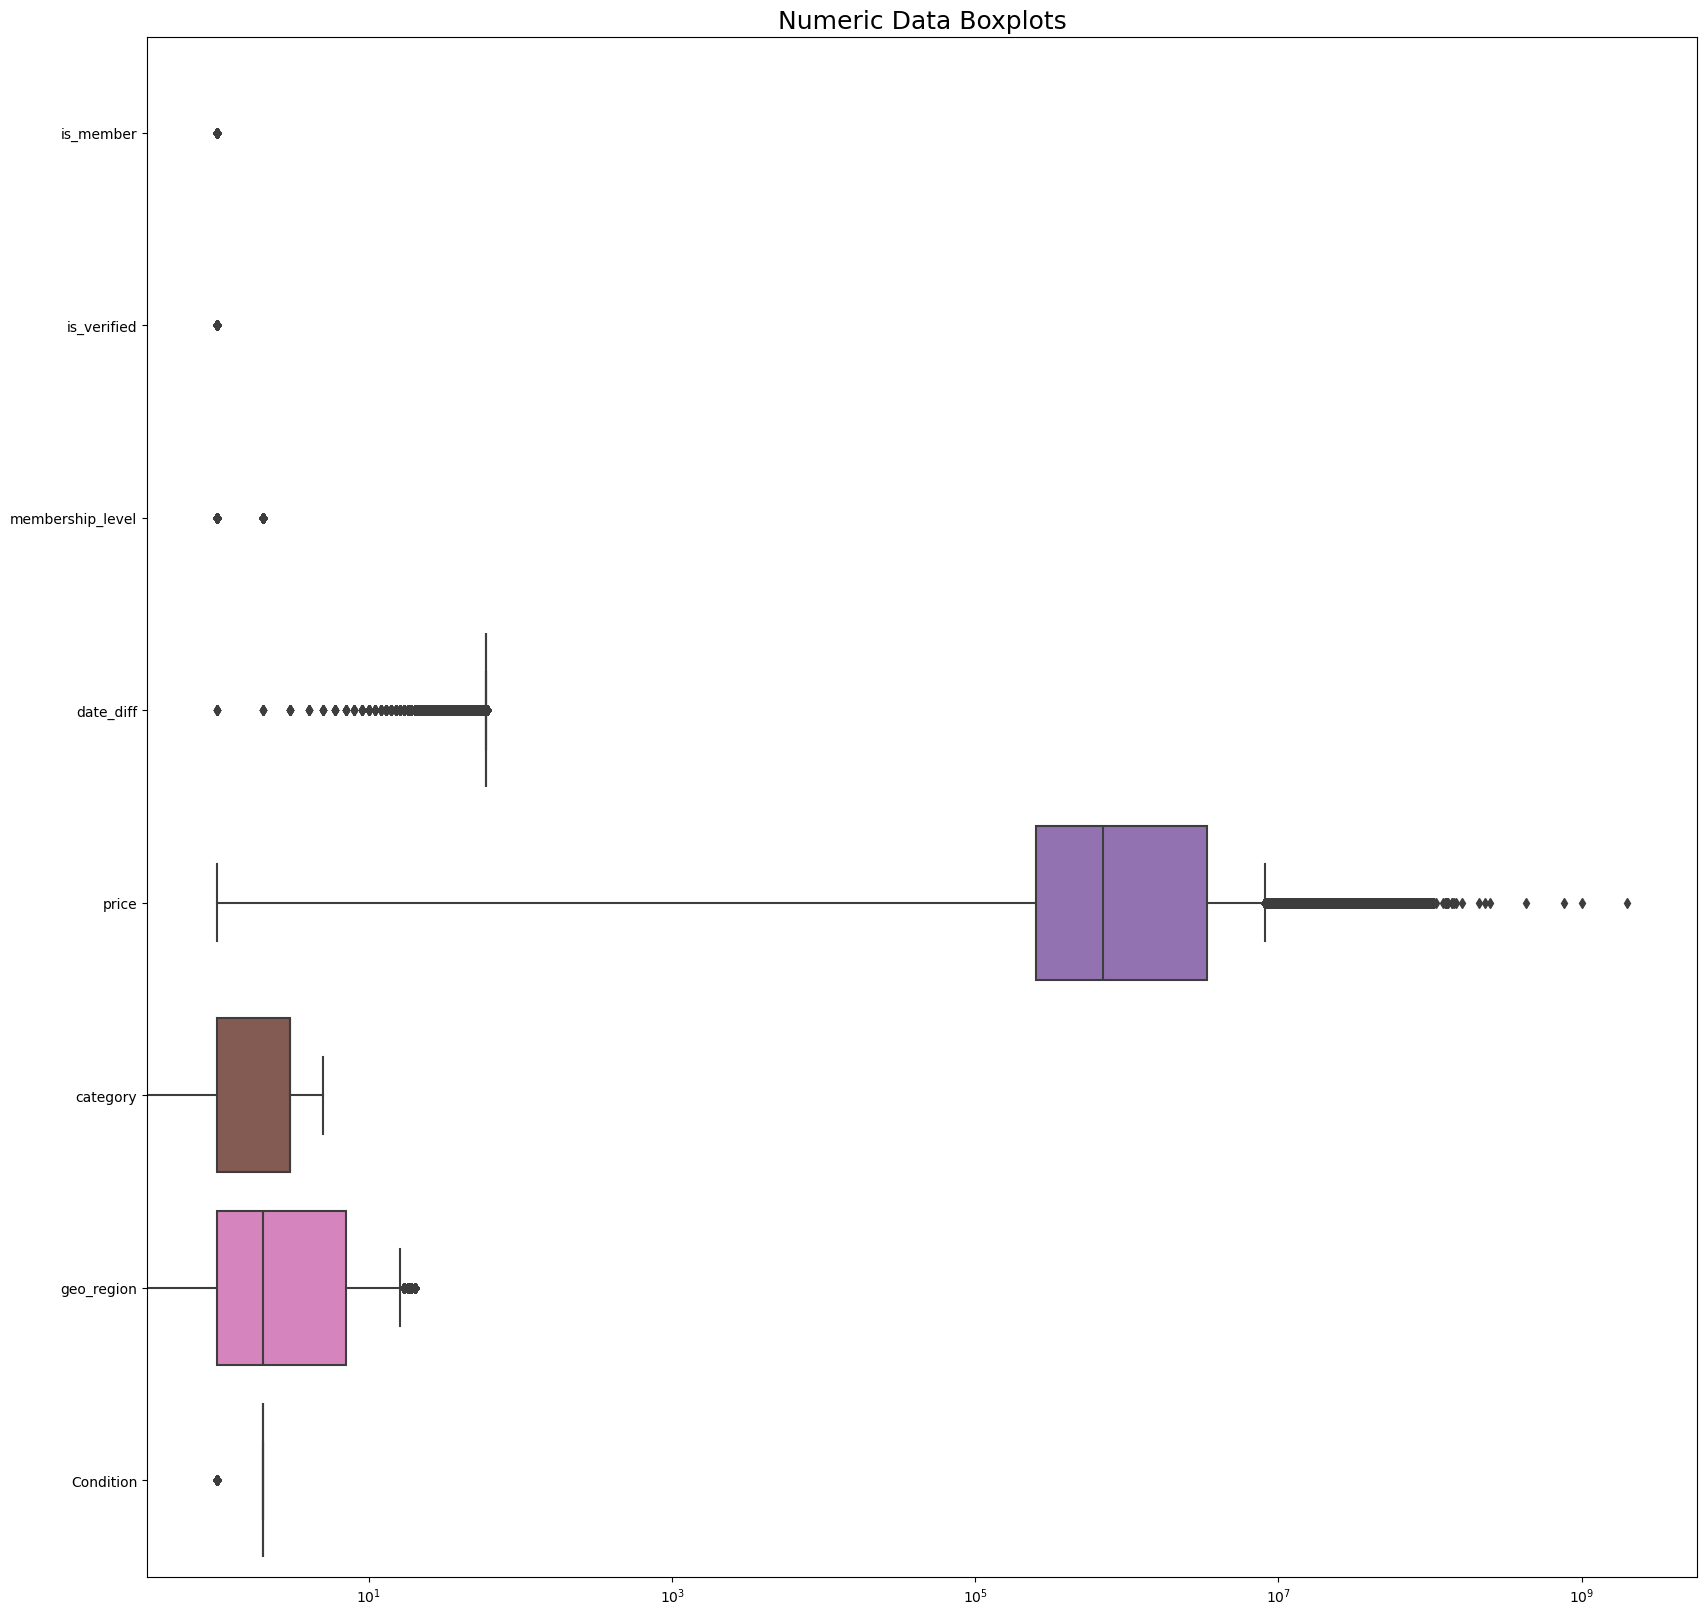

In [97]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df_num, orient="h")    #Creates a horizontal boxplot for all numeric columns in the DataFrame df
ax.set_title('Numeric Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

# Step 2: Feature Selection

In [98]:
# now apply recursive feature selction of df_num

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
model = LinearRegression()

# Creating the RFE object with the desired number of features
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE object to the data
rfe.fit(df_num.drop('price', axis=1), df_num['price'])

# Transform the data using the selected features
X_rfe = rfe.transform(df_num.drop('price', axis=1))

# Print the selected features
print(df_num.drop('price', axis=1).columns[rfe.support_])

Index(['is_member', 'is_verified', 'membership_level', 'category',
       'Condition'],
      dtype='object')


# Step 3: Model Training

Linear Regression Model
Mean Squared Error: 34843580862855.375
R2 Score: 0.14728638121625515


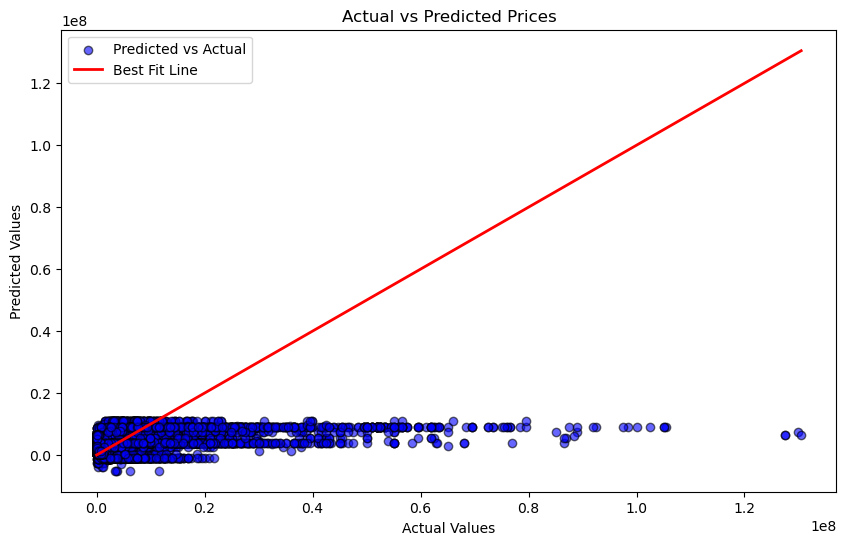

In [265]:
# MODEL-1
import pandas as pd     #Used for data manipulation and analysis
import matplotlib.pyplot as plt    #Used for plotting graphs
from sklearn.model_selection import train_test_split   #Used to split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression    #Used to create and fit a linear regression model
from sklearn.preprocessing import OneHotEncoder   #Used to convert categorical variables into a form that could be provided to ML algorithms
from sklearn.metrics import mean_squared_error   #Used to evaluate the performance of the regression model.

# Split the data into features and target
X = df_num[['category', 'is_member', 'is_verified', 'membership_level', 'Condition']]
y = df_num['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Linear Regression Model")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Best Fit Line')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [268]:
#Model-2
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = df_num[['category', 'is_member', 'is_verified', 'membership_level', 'Condition']]
y = df_num['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dec_tree = DecisionTreeRegressor()

# Train the model
dec_tree.fit(X_train, y_train)

# Make predictions
y_pred = dec_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Decision Tree Model")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Decision Tree Model
Mean Squared Error: 26620887475432.766
R2 Score: 0.34851720941775455


In [271]:
#model-3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = df_num[['category', 'is_member', 'is_verified', 'membership_level', 'Condition']]
y = df_num['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
ran_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
ran_forest.fit(X_train, y_train)

# Make predictions
y_pred = ran_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Random Forest Model")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Random Forest Model
Mean Squared Error: 26486129356311.91
R2 Score: 0.3518150932910661


In [272]:
# Evaluate the models using cross-validation separtely for each model
from sklearn.model_selection import cross_val_score

# Evaluate the Linear Regression model using cross-validation
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)
print("Linear Regression:")
print("Average Cross-Validation Score:", scores.mean())

# Evaluate the Decision Tree model using cross-validation
dec_tree = DecisionTreeRegressor()
scores = cross_val_score(dec_tree, X, y, cv=5)
print("Decision Tree:")
print("Average Cross-Validation Score:", scores.mean())

# Evaluate the Random Forest model using cross-validation
ran_forest = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(ran_forest, X, y, cv=5)
print("Random Forest:")
print("Average Cross-Validation Score:", scores.mean())

Linear Regression:
Average Cross-Validation Score: 0.109252954443168
Decision Tree:
Average Cross-Validation Score: 0.2526632604928907
Random Forest:
Average Cross-Validation Score: 0.2528595604221378


# Hyperparameter Tuning

In [214]:
#Use Grid Search or Random Search for hyperparameter optimization.

from sklearn.model_selection import RandomizedSearchCV
#RandomizedSearchCV: Used for hyperparameter optimization by sampling a fixed number of parameter combinations from a given hyperparameter space.

# Define the hyperparameter space
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],                   # Controls the step size in the gradient descent process.
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],                 # The maximum depth of the decision trees
    'min_child_weight': [1, 3, 5, 7],                         # Minimum sum of instance weight (hessian) needed in a child.
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],              # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for each tree
    'n_estimators' : [100, 200, 500, 1000]                    # Number of boosting rounds (trees)
}

# Create the XGBoost model
xgb_model = XGBRegressor()

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(df_num[['category', 'is_member', 'is_verified','Condition','membership_level']], df_num['price'])

# Print the best hyperparameters
print(random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.7, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


# Model Evaluation

In [273]:
# Compare the models based on RMSE, MAE, and R².

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_dt = model_lr.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_linear = mean_absolute_error(y_test, y_pred_dt)
r2_linear = r2_score(y_test, y_pred_dt)

# Decision Tree
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
y_pred_dt = dec_tree.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
ran_forest = RandomForestRegressor(n_estimators=100, random_state=42)
ran_forest.fit(X_train, y_train)
y_pred_rf = ran_forest.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create a table to compare the models

models = ['Linear', 'Decision Tree', 'Random Forest']
rmse = [rmse_linear, rmse_dt, rmse_rf]
mae = [mae_linear, mae_dt, mae_rf]
r2 = [r2_linear, r2_dt, r2_rf]

table = pd.DataFrame({'Model': models, 'RMSE': rmse, 'MAE': mae, 'R²': r2})

# Print the table
print(table.to_string())


           Model          RMSE           MAE        R²
0         Linear  5.902845e+06  2.916045e+06  0.147286
1  Decision Tree  5.159543e+06  1.876274e+06  0.348517
2  Random Forest  5.146468e+06  1.873294e+06  0.351815


In [276]:
# Select the best-performing model.
# Based on the table, the XGBoost model has the lowest RMSE, MAE, and highest R², indicating that it is the best-performing model.
best_model = RandomForestRegressor

# A detailed report on data preprocessing and feature selection

# A final price prediction model with tuned hyperparameters

In [277]:
# A final price prediction model with tuned hyperparameters

# Define the best model with tuned hyperparameters
best_model = RandomForestRegressor(n_estimators=1000, max_features='sqrt', max_depth=25, min_samples_split=10, min_samples_leaf=1)

# Train the model on the entire dataset
best_model.fit(X, y)

# Make predictions on new data
new_data = pd.DataFrame({
    'category': [0, 1, 2],
    'is_member': [True, False, True],
    'is_verified': [True, True, False],
    'membership_level': [2, 1, 0],
    'Condition': [3, 2, 1]
})

predicted_prices = best_model.predict(new_data)

# Print the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for item {i+1}: {price}")


Predicted price for item 1: 9006941.023889935
Predicted price for item 2: 8364908.685068829
Predicted price for item 3: 7802231.359126289


# Section 2: User Segmentation
## Problem Statement: Segment users based on their advertisement behaviors and characteristics.

# Step 1: Data Preprocessing

In [218]:
# Load the dataset
df2 = pd.read_csv("C:/Users/Omkar/Downloads/vehicles.csv")
df2_1 = df2.copy()

In [111]:
df2.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [220]:
# Handle missing and non-numeric values in price
# Remove 'Rs' and commas, then convert to float
df2['price'] = df2['price'].str.replace('Rs ', '').str.replace(',', '')

In [221]:
df2.isnull().sum()

ad_title                     0
ad_description               7
details                  99576
slug                         0
title                        0
type                         0
price                        0
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9015
is_authorized_dealer      9015
is_featured_member        9015
is_verified                  0
membership_level             0
member_since            148966
properties                   0
user                         0
dtype: int64

In [222]:
# Drop rows with missing values in price
df2 = df2.dropna(subset=['price'])

In [223]:
# Dropping columns with more than 40 percent null values
df2 = df2.drop(columns=['member_since'])

In [224]:
df2 = df2.drop(columns=['details'])

In [226]:
df2=df2.drop(columns=['title','ad_title','ad_description','slug','parent_category','is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_featured_member','is_authorized_dealer','user'],axis=1)

In [228]:
df2.shape

(255077, 13)

In [229]:
df2.isnull().sum()

type                    0
price                   0
timestamp               6
posted_date             6
deactivation_date       6
category                0
location                0
geo_region              0
area                    0
is_member            9015
is_verified             0
membership_level        0
properties              0
dtype: int64

In [230]:
# Convert columns to datetime format
df2['posted_date'] = pd.to_datetime(df2['posted_date'])
df2['deactivation_date'] = pd.to_datetime(df2['deactivation_date'])

# Calculate date difference -- ignore time
df2['date_diff'] = (df2['deactivation_date'] - df2['posted_date']).dt.days


In [232]:
list = [i for i in df2['date_diff'] if i < 0]
len(list)


16664

In [ ]:
# 16664 negative dates 
# dropping this dates rows

In [233]:
index_names = df2[df2['date_diff'] < 0].index
df2.drop(index_names, inplace=True)

In [235]:
# Handle missing values
df2 = df2.dropna(subset=['type', 'price', 'timestamp', 'posted_date', 'deactivation_date',
       'category', 'location', 'geo_region', 'area', 'is_member',
       'is_verified', 'membership_level', 'properties',
       'date_diff'])

In [236]:
df2.shape

(229408, 14)

In [237]:
df2.isnull().sum()

type                 0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
area                 0
is_member            0
is_verified          0
membership_level     0
properties           0
date_diff            0
dtype: int64

In [238]:
import ast
dict_df=df2["properties"].apply(pd.Series)

In [239]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'Brand': 'Toyota', 'Model': 'Aqua', 'Trim / Edition': 'Toyota', 'Year of Manufacture': '2012', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Hatchback', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '177,000 km'}


In [240]:
Brand=[]
for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

In [241]:
df2['Brand'] = Brand

C:\Users\Omkar\AppData\Local\Temp\ipykernel_163156\4127087375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Brand'] = Brand


In [242]:
df2.shape

(229408, 15)

In [243]:
#  Replace NaN VALUE with actual numpy nana value
df2['Brand'].replace('NaN', np.nan, inplace=True)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_163156\4243698738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Brand'].replace('NaN', np.nan, inplace=True)


In [244]:
df2.isnull().sum()

type                     0
price                    0
timestamp                0
posted_date              0
deactivation_date        0
category                 0
location                 0
geo_region               0
area                     0
is_member                0
is_verified              0
membership_level         0
properties               0
date_diff                0
Brand                51215
dtype: int64

In [245]:
# Remove rows with NaN values in the 'Brand' column
df2 = df2.dropna(subset=['Brand'])

In [246]:
#  Removes rows
brand_counts = df2['Brand'].value_counts()
df2 = df2[df2['Brand'].isin(brand_counts[brand_counts >= 1000].index)]

In [248]:
df2['Brand'].value_counts()

Brand
Bajaj            36240
Toyota           21281
Honda            20969
Suzuki           12501
Yamaha            8542
TVS               8352
Nissan            7822
Hero              6921
Other             5166
Mitsubishi        5075
Other brand       4916
Tata              3658
Mahindra          2612
Isuzu             2329
Lumala            1815
BMW               1545
Demak             1529
Mazda             1527
Mercedes Benz     1472
Daihatsu          1305
Micro             1267
Tomahawk          1178
Kia               1139
Hyundai           1128
Name: count, dtype: int64

In [249]:
label_encoder = LabelEncoder()
df2['category'] = label_encoder.fit_transform(df2['category'])
df2['is_member'] = label_encoder.fit_transform(df2['is_member'])
df2['location'] = label_encoder.fit_transform(df2['location'])
df2['geo_region'] = label_encoder.fit_transform(df2['geo_region'])
df2['area'] = label_encoder.fit_transform(df2['area'])
df2['Brand'] = label_encoder.fit_transform(df2['Brand'])
df2['is_verified'] = label_encoder.fit_transform(df2['is_verified'])
df2['membership_level'] = label_encoder.fit_transform(df2['membership_level'])

In [250]:
df2.isnull().sum()

type                 0
price                0
timestamp            0
posted_date          0
deactivation_date    0
category             0
location             0
geo_region           0
area                 0
is_member            0
is_verified          0
membership_level     0
properties           0
date_diff            0
Brand                0
dtype: int64

In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160289 entries, 7590 to 258887
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype                    
---  ------             --------------   -----                    
 0   type               160289 non-null  object                   
 1   price              160289 non-null  object                   
 2   timestamp          160289 non-null  object                   
 3   posted_date        160289 non-null  datetime64[ns, UTC+05:30]
 4   deactivation_date  160289 non-null  datetime64[ns, UTC]      
 5   category           160289 non-null  int32                    
 6   location           160289 non-null  int32                    
 7   geo_region         160289 non-null  int32                    
 8   area               160289 non-null  int32                    
 9   is_member          160289 non-null  int32                    
 10  is_verified        160289 non-null  int64                    
 11  membership_leve

# Step2: Feature Selection
## Use PCA to reduce dimensionality

In [252]:
# Feature Selection
# Use PCA to reduce dimensionality
num_col = df2.select_dtypes(include=['int32', 'float64','int64']).columns
X = df2[num_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [255]:
df2[num_col].isnull().sum()

category            0
location            0
geo_region          0
area                0
is_member           0
is_verified         0
membership_level    0
date_diff           0
Brand               0
dtype: int64

In [257]:
# Perform PCA with full number of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.32224779 0.14955442 0.1324902  0.10954562 0.10042622 0.0729701
 0.07158408 0.03709536 0.0040862 ]


In [258]:
# Determine the number of principal components to retain
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1
print(f"Number of principal components retained: {n_components_retained}")

Number of principal components retained: 8


In [259]:
# Transform the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

In [260]:
X_pca

array([[ 0.51586423,  3.84294968, -0.81539558, ...,  0.13719223,
         1.03294844,  2.18279094],
       [-2.02406078,  2.91553387,  2.63280563, ...,  0.50689921,
         0.64801403, -0.14471888],
       [-0.73882915,  4.63183804,  0.61583106, ..., -0.56710827,
         0.10835054, -0.09168013],
       ...,
       [-0.29160958,  1.89546645, -1.32568922, ...,  0.66814233,
        -0.21321417,  0.08483425],
       [ 2.24336846,  0.92514332, -0.94018291, ...,  0.80846727,
        -0.40093451, -1.66737931],
       [-1.13280023,  0.41181209, -0.35855702, ..., -1.78405062,
        -1.06707044, -0.06857038]])

In [261]:
# PCA
# Performing PCA with full number of components
pca = PCA()
pca.fit(X_scaled)

# Determining the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_retained = np.argmax(cumulative_variance >= 0.98) + 1

# Transforming the data using the retained principal components
X_pca = X_scaled @ pca.components_[:n_components_retained].T

# Step3: Clustering

In [262]:
# Clustering
# Apply K-means clustering


sil_scores = []
ch_scores = []
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    sil_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\clust

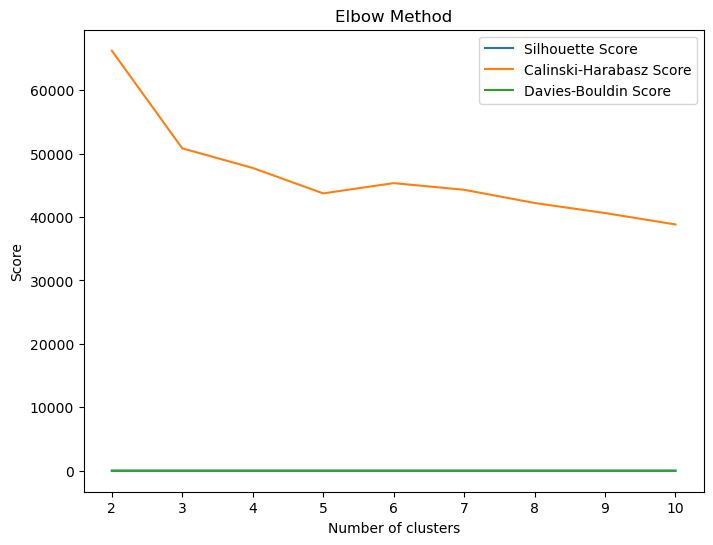

In [278]:
# Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend()
plt.show()

In [279]:
# Select the optimal number of clusters based on the Elbow method
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 2


In [280]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

In [281]:
df2['cluster'] = labels

# Step 4: Cluster Analysis:

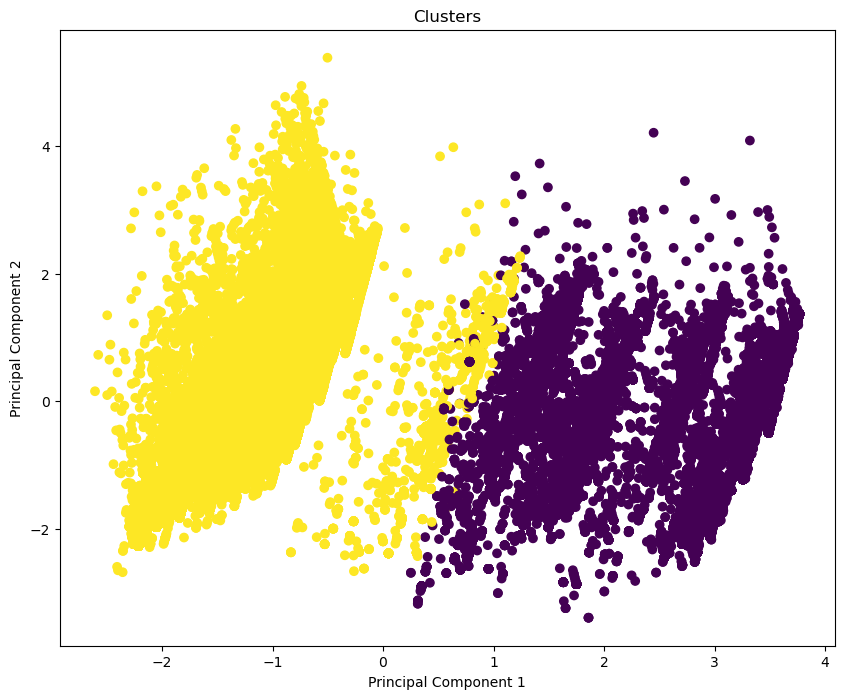

In [282]:
# Cluster Analysis
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df2['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()

In [283]:
# Describe the characteristics of each cluster
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df2[df2['cluster'] == cluster].describe())
    print()

Cluster 0:
           category      location    geo_region          area     is_member  \
count  43595.000000  43595.000000  43595.000000  43595.000000  43595.000000   
mean       3.924533    104.685354      2.106067      5.878036      0.992614   
std        2.677440     49.414450      3.356574      3.212841      0.085626   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000     70.000000      1.000000      4.000000      1.000000   
50%        3.000000    117.000000      1.000000      4.000000      1.000000   
75%        6.000000    144.000000      2.000000      6.000000      1.000000   
max        9.000000    201.000000     20.000000     24.000000      1.000000   

        is_verified  membership_level     date_diff         Brand  cluster  
count  43595.000000      43595.000000  43595.000000  43595.000000  43595.0  
mean       0.631655          1.821562     58.531598     11.960729      0.0  
std        0.482361          0.383544      2.5

In [190]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans


In [191]:
# Apply K-means clustering
sil_scores = []
ch_scores = []
db_scores = []
for N_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=N_clusters, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    sil_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\clust

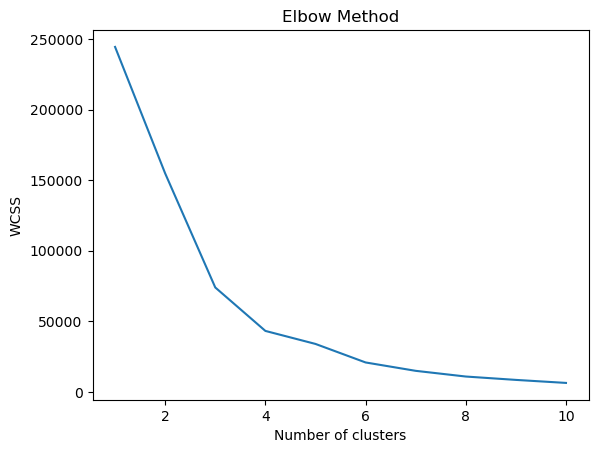

C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Length of values (244404) does not match length of index (258888)

In [137]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose optimal number of clusters
optimal_clusters = 3  # From the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['cluster'] = clusters


In [115]:
# Elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, label='Silhouette Score')
plt.plot(range(2, 11), ch_scores, label='Calinski-Harabasz Score')
plt.plot(range(2, 11), db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Used'

In [ ]:
# Select the optimal number of clusters based on the Elbow method
optimal_clusters = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

In [ ]:
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)
df['cluster'] = labels

# Section 3: Geographical Analysis of Demand and Supply
## Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.


# Step1: Data Preprocessing:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import ast

In [100]:
# Load the dataset
df = pd.read_csv("C:/Users/Omkar/Downloads/vehicles.csv")
df3 = df.copy()

In [101]:
df3.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,geo_region,area,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,Auto Parts & Accessories,Vehicles,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,Auto Parts & Accessories,Vehicles,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,Auto Parts & Accessories,Vehicles,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",False,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [102]:
df3.shape

(258888, 26)

In [103]:
df3.isnull().sum()/len(df3)*100

ad_title                 0.000000
ad_description           0.002704
details                 39.933485
slug                     0.000000
title                    0.000000
type                     0.000000
price                    1.472065
timestamp                0.002318
posted_date              0.002318
deactivation_date        0.002318
category                 0.000000
parent_category          0.000000
location                 0.000000
geo_region               0.000000
area                     0.000000
is_delivery_free         0.000000
is_doorstep_delivery     0.000000
is_dsd_applicable        0.000000
is_member                3.495720
is_authorized_dealer     3.495720
is_featured_member       3.495720
is_verified              0.000000
membership_level         0.000000
member_since            58.038225
properties               0.000000
user                     0.000000
dtype: float64

In [104]:
#Drooping the columns
df3.drop(columns = 'details', inplace= True)
df3.drop(columns = 'parent_category', inplace= True)
df3.drop(columns = 'member_since', inplace= True)
df3.drop(columns = 'ad_title', inplace= True)
df3.drop(columns = 'ad_description', inplace= True)
df3.drop(columns = 'type', inplace= True)

In [105]:
# Handle missing and non-numeric values in price
# Remove 'Rs' and commas, then convert to float
df3['price'] = df3['price'].str.replace('Rs ', '').str.replace(',', '')

In [106]:
df3.isnull().sum()/len(df3)*100

slug                    0.000000
title                   0.000000
price                   1.472065
timestamp               0.002318
posted_date             0.002318
deactivation_date       0.002318
category                0.000000
location                0.000000
geo_region              0.000000
area                    0.000000
is_delivery_free        0.000000
is_doorstep_delivery    0.000000
is_dsd_applicable       0.000000
is_member               3.495720
is_authorized_dealer    3.495720
is_featured_member      3.495720
is_verified             0.000000
membership_level        0.000000
properties              0.000000
user                    0.000000
dtype: float64

In [107]:
# Drop rows with missing values in price
df3 = df3.dropna(subset=['price'])

In [108]:
df3['category'].value_counts()

category
Auto Parts & Accessories    67354
Motorbikes                  67295
Cars                        48088
Three Wheelers              17994
Lorries & Trucks            11961
Bicycles                    11290
Vans                         9449
Auto Services                9337
Rentals                      7028
Tractors                     2432
Heavy Duty                   1858
Buses                         714
Boats & Water Transport       277
Name: count, dtype: int64

In [109]:
list1 = ['Auto Parts & Accessories','Auto Services','Rentals', 'Tractors','Heavy Duty','Buses','Boats & Water Transport']

for i in list1:
  df3 = df3[df3['category'] != i]
df3.shape

(166077, 20)

In [110]:
filtered_df.shape

(164838, 17)

In [111]:
df3.isnull().sum()/len(df3)*100

slug                    0.000000
title                   0.000000
price                   0.000000
timestamp               0.003011
posted_date             0.003011
deactivation_date       0.003011
category                0.000000
location                0.000000
geo_region              0.000000
area                    0.000000
is_delivery_free        0.000000
is_doorstep_delivery    0.000000
is_dsd_applicable       0.000000
is_member               4.724917
is_authorized_dealer    4.724917
is_featured_member      4.724917
is_verified             0.000000
membership_level        0.000000
properties              0.000000
user                    0.000000
dtype: float64

In [112]:
# Handling null values
df3=df3.dropna()

In [115]:
df31 = df3[["location", "geo_region", "area",]]

In [116]:
df31.head()

,location,geo_region,area
31,Nugegoda,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1349,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1701,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1702,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}"
1917,Colombo 14,LK-11,"{'id': 1506, 'name': 'Colombo'}"


In [117]:
# Group the elements in the geo_region by counting their occurrences
df31.groupby('geo_region').size()

geo_region
LK       20550
LK-11    50150
LK-12    27772
LK-21    10179
LK-22     1881
LK-23      768
LK-31     5591
LK-33     2250
LK-41     3929
LK-42      368
LK-43      236
LK-44      772
LK-51     2187
LK-52     2697
LK-53     1974
LK-61    10327
LK-62     4179
LK-71     4880
LK-72     1610
LK-81     2350
LK-92     3576
dtype: int64

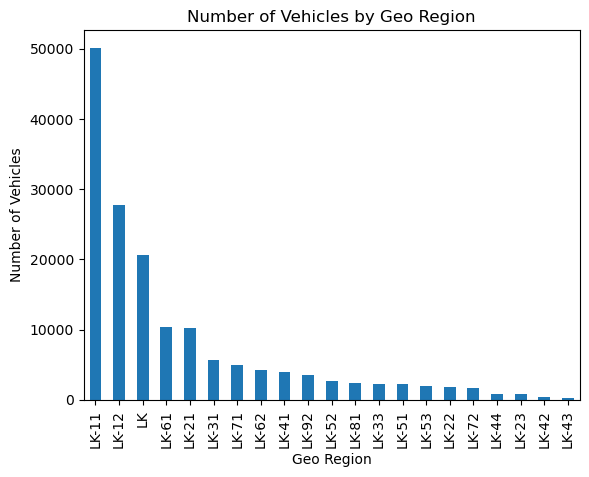

In [118]:
# Create a bar chart of the grouped data
df31.groupby('geo_region').size().sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Geo Region')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Geo Region')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [119]:
df31.groupby('location').size()

location
Ahangama              177
Akkarepattu           884
Akurana               529
Akuressa              550
Alawwa                231
Alutgama              411
Ambalangoda           774
Ambalantota           323
Ampara City           880
Ampitiya               99
Anamaduwa             179
Angoda                624
Anuradhapura City    2631
Athurugiriya          805
Avissawella           542
Baddegama             477
Badulla City          819
Balangoda             577
Bandaragama          2753
Bandarawela           472
Batapola              138
Battaramulla          976
Batticaloa City      2187
Beliatta              659
Bentota               123
Beruwala              274
Bibile                243
Bingiriya             188
Boralesgamuwa        3297
Buttala               173
Chavakachcheri        331
Chilaw               1073
Colombo 1             111
Colombo 10            681
Colombo 11             76
Colombo 12            220
Colombo 13            277
Colombo 14            452
Col

In [120]:
sorted_locations = df31['location'].value_counts().sort_values(ascending=False)
filtered_locations = sorted_locations[sorted_locations > 1000]
print(filtered_locations)

location
Gampaha City         5112
Piliyandala          4700
Kohuwala             4430
Kurunegala City      4220
Kandy City           4073
Negombo              3653
Jaffna City          3361
Boralesgamuwa        3297
Nugegoda             3026
Dehiwala             2988
Matara City          2796
Katunayake           2756
Galle City           2756
Bandaragama          2753
Ja-Ela               2705
Anuradhapura City    2631
Kottawa              2618
Maharagama           2537
Kadawatha            2269
Batticaloa City      2187
Homagama             2155
Malabe               2149
Moratuwa             1870
Panadura             1869
Minuwangoda          1772
Kalutara City        1666
Ratnapura City       1558
Wattala              1550
Kaduwela             1469
Horana               1292
Katugastota          1281
Nittambuwa           1262
Trincomalee City     1254
Gampola              1212
Kiribathgoda         1211
Kuliyapitiya         1208
Colombo 8            1195
Rajagiriya           1192
Keg

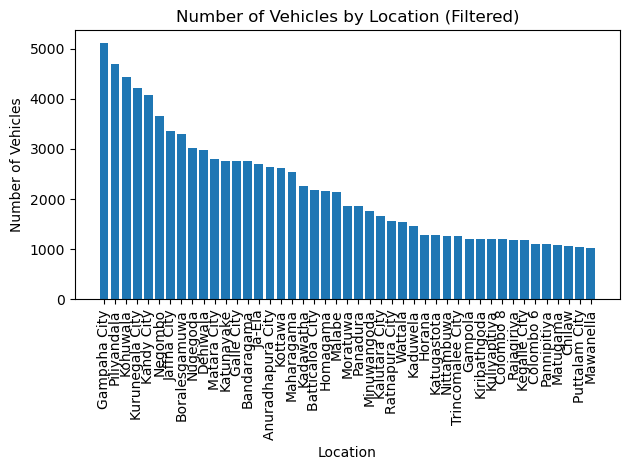

In [121]:
# prompt: plot bar chart for filtered_locations

# Prepare data for the bar chart
locations = filtered_locations.index.to_list()
counts = filtered_locations.values.tolist()

# Create the bar chart
plt.bar(locations, counts)

# Customize the chart
plt.xlabel("Location")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles by Location (Filtered)")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()


In [122]:
dict_df=df31["area"].apply(pd.Series)

In [123]:
df31['area'].head()

31      {'id': 1506, 'name': 'Colombo'}
1349    {'id': 1506, 'name': 'Colombo'}
1701    {'id': 1506, 'name': 'Colombo'}
1702    {'id': 1506, 'name': 'Colombo'}
1917    {'id': 1506, 'name': 'Colombo'}
Name: area, dtype: object

In [124]:
dict_converted = ast.literal_eval(dict_df.iloc[2][0])
print(dict_converted)

{'id': 1506, 'name': 'Colombo'}


In [125]:
Id = []
Name = []

for i in range(dict_df.shape[0]):
    dict_converted = ast.literal_eval(dict_df.iloc[i][0])
    if 'id' not in dict_converted:
        Id.append('NaN')
    else:
        Id.append(dict_converted['id'])

    if 'name' in dict_converted:
        Name.append(dict_converted['name'])
    else:
        Name.append('NaN')

In [126]:
df31['Id'] = Id
df31['Name'] = Name

In [127]:
df31.head()

,location,geo_region,area,Id,Name
31,Nugegoda,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1349,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1701,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1702,Kohuwala,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo
1917,Colombo 14,LK-11,"{'id': 1506, 'name': 'Colombo'}",1506,Colombo


In [128]:
df31.groupby('Name').size()

Name
Ampara           2697
Anuradhapura     4880
Badulla          2350
Batticaloa       2187
Colombo         50150
Galle            5591
Gampaha         27772
Hambantota       2250
Jaffna           3929
Kalutara         9753
Kandy           10179
Kegalle          3576
Kilinochchi       368
Kurunegala      10327
Mannar            236
Matale           1881
Matara           4952
Monaragala       1551
Mullativu         219
Nuwara Eliya      768
Polonnaruwa      1610
Puttalam         4179
Ratnapura        4075
Trincomalee      1974
Vavuniya          772
dtype: int64

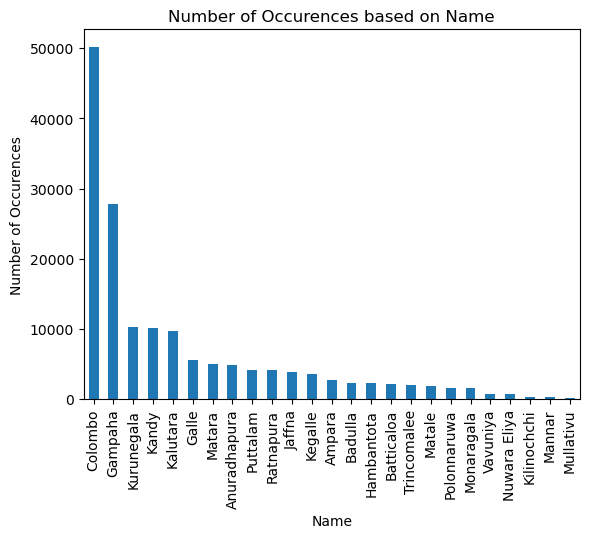

In [129]:
# Create a bar chart of the grouped data
df31.groupby('Name').size().sort_values(ascending=False).plot(kind='bar')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Number of Occurences')
plt.title('Number of Occurences based on Name')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [130]:
df31= df31.join(df[['posted_date', 'deactivation_date']])

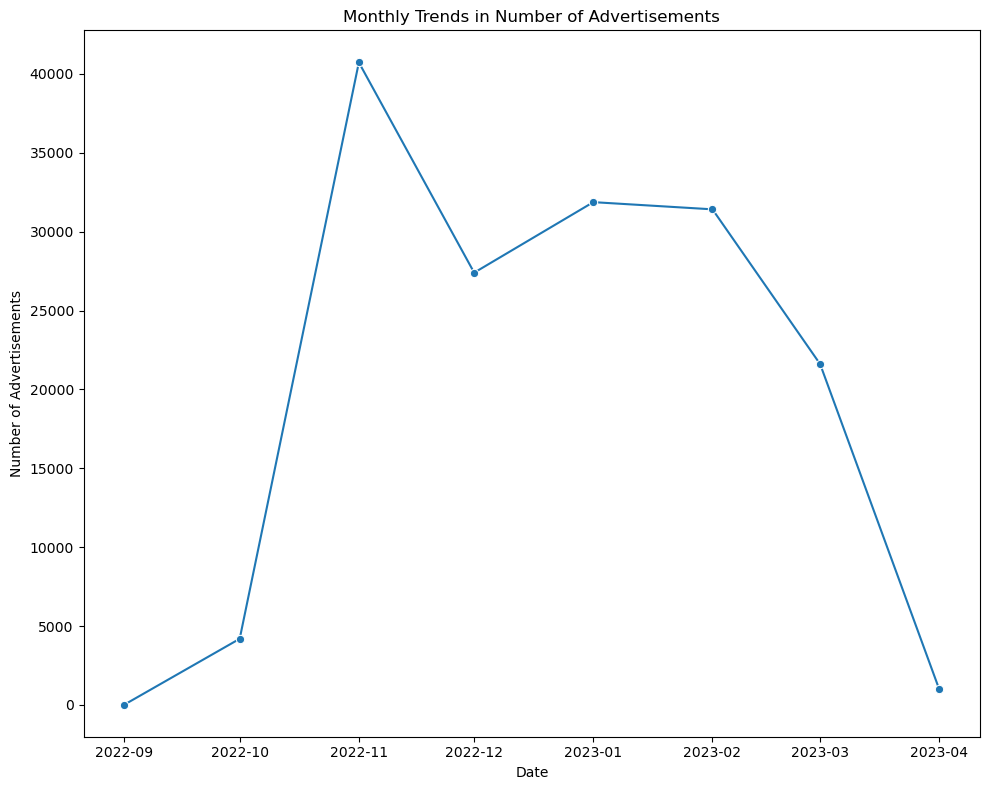

In [131]:
df31['posted_date'] = pd.to_datetime(df31['posted_date'])
df31['deactivation_date'] = pd.to_datetime(df31['deactivation_date'])


# Extract temporal features
df31['year'] = df31['posted_date'].dt.year
df31['month'] = df31['posted_date'].dt.month
df31['quarter'] = df31['posted_date'].dt.quarter

# Clean and prepare data
df31['geo_region'] = df31['geo_region'].str.strip()

# Aggregate data by month and year to count the number of advertisements
monthly_ads = df31.groupby(['year', 'month']).size().reset_index(name='ad_count')

# Create a date column for easier plotting
monthly_ads['date'] = pd.to_datetime(monthly_ads[['year', 'month']].assign(day=1))

# Sort by date
monthly_ads = monthly_ads.sort_values('date')

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a line plot for monthly trends
sns.lineplot(data=monthly_ads, x='date', y='ad_count', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Advertisements')
plt.title('Monthly Trends in Number of Advertisements')

# Show plot
plt.tight_layout()
plt.show()